# 1. resnet50 expects image resolution (224, 224) with 3 channels.


In [1]:
import albumentations as A
import cv2



/Users/karlxu/Workspace/github/xuyuji9000/machine-learning-playground/05-models/05-resnet50/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# 1. Define the augmentation pipeline

transform = A.Compose([
    A.Resize(width=224, height=224),
])


In [11]:
# 2. Load an image using OpenCV (Note: Albumentations expects RGB)

IMAGE_FILE='../../03-datasets/03-flickr-8k/data/Images/667626_18933d713e.jpg'

image = cv2.imread(IMAGE_FILE)



# matplotlib plot expect R, G, B color channel sequence
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image.shape

(375, 500, 3)

In [12]:
# 3. Apply the transformations
# The result is a dictionary; we grab the 'image' key


transformed = transform(image=image)
transformed_image = transformed["image"]

image.shape, transformed_image.shape

((375, 500, 3), (224, 224, 3))

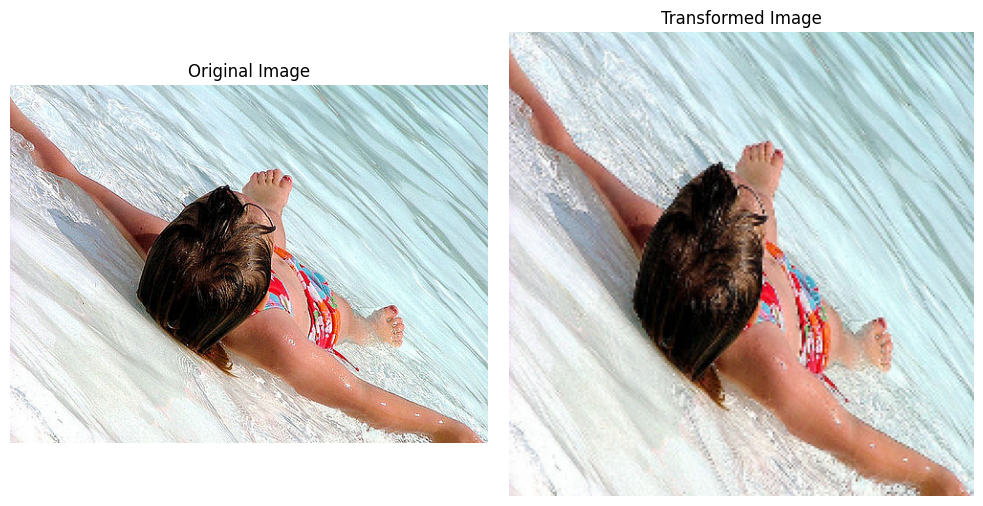

In [13]:
# 4. Plot original and transformed image side by side
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(transformed_image)
axs[1].set_title('Transformed Image')
axs[1].axis('off')
plt.tight_layout()
plt.show()

# 2. resnet50 expects shape [1, 3, 224, 224] tensor.

In [15]:
# 1. display the current shape 
transformed_image.shape, type(transformed_image)


((224, 224, 3), numpy.ndarray)

In [18]:
# 2. convert numpy array to pytorch tensor

import torch
transformed_tensor = torch.from_numpy(transformed_image)
transformed_tensor.shape

torch.Size([224, 224, 3])

In [20]:
# Prepare the tensor for ResNet50: expected shape [1, 3, 224, 224] and dtype float, normalized to [0,1]
# Permute dimensions from [H, W, C] to [C, H, W]
resnet_input = transformed_tensor.permute(2, 0, 1).unsqueeze(0).float()
resnet_input.shape

torch.Size([1, 3, 224, 224])